# Series de Pandas

---

**Autor:** César Husillos Rodríguez

**Email:** c.husillos@igme.es

---

## 1. ¿Que es una Serie de Pandas?

Podría pensarse en una serie en Pandas como un "array 1-D especial". También como un diccionario de Python con sus pares "clave" y "valor".
Las claves del diccionario se corresponderían con los **índices** de la Serie. Los valores de ese diccionario serían los **datos** almacenados en la Serie que son accesibles a través de la correspondiente índice único.

En una Serie, como en un diccionario, se puede acceder a todas sus claves y a todos sus valores. En el primer caso se realiza con una llamada a *nombre_serie.index*. Devuelve u objeto de tipo *Index*, que es un tipo especial definido en Pandas. En el segundo caso, el acceso a los valores de una serie se realiza de la forma *nombre_serie.values*, que devuelve un objeto de tipo *ndarray*.

Por defecto, **toda Serie en Pandas tiene índices implícitos definidos**. Estos índices están constituidos por una secuencia numérica consecutiva de valores enteros que comienzan en 0.

Además de los índices explícitos, se puede asociar otro **índice explícito**, normalmente representado por una cadena de texto y que resulta más sencillo de asociar a un valor en concreto de la Serie. Se pueden seleccionar elementos de una Serie haciendo uso de índices implícitos (posición) o explícitos (etiquetas textuales). Se puede acceder a los elementos de una Serie usando su índice implícito o explícito.

Una Serie además tiene la propiedad **name**, que pasará a ser la cabecera de la columna de datos que gestiona la Serie como valores.

### 1.1. Propiedades de una Serie

Las mismas que las que tiene un array y alguna más. Entre las nuevas, se escriben algunas en la siguiente tabla:

| Propiedad | Tipo de valor devuelto | Descripción|
| :-- | :-- | :---|
| index | RangeIndex | Devuelve el índice implicito de la Serie. |
| values | ndarray | Devuelve el array de valores contenido en la Serie.|
| name | str o None | Devuelve el nombre la Serie. |
| is_unique| bool | True si no hay valores repetidos en la Serie. |
| is_monotonic_increasing | bool | True si los valores de la Serie están ordenados de forma monótona creciente. |
| is_monotonic_decreasing | bool | True si los valores de la Serie están ordenados de forma monótona decreciente.  |
| empty | bool | True si la Serie no tiene valores. |

## 2. Creación de una Serie

Para generar una serie, primero hay que **importar la librería Pandas**. La forma más usada de hacerlo es mediante un alias en la forma:

In [ ]:
import pandas as pd

import numpy as np

Como en el caso de arrays de NumPy, existen varias posibilidades:

1. Usando el constructor de la clase *pd.Series*
2. Cargando series desde ficheros.
3. Extrayendo Series de estructuras de datos más complejas en Pandas (como los *DataFrames*)

El constructor de la clase Series se define (de forma resumida) de la siguiente forma:

donde todos los parámetros son opcionales.

Podríamos crear una Serie vacía

In [ ]:
vacia = pd.Series()
print(type(vacia))
print(vacia.empty)

O una Serie que tuviera sólo los índices o sólo los valores o sólo un nombre.

En la forma más sencilla, para crear una Serie bastaría pasarle como datos un objeto iterable (lista, tupla, array...) al parámetro *data* del **constructor** de Series, como muestra el siguiente ejemplo:

In [ ]:
serie1 = pd.Series(data=[-1, -2, 6, 8, 22, 13])

Veamos lo que hemos generado...

In [ ]:
print(type(serie1))

In [ ]:
print(serie1)

Accedemos a las claves de la Serie que, como hemos comentado antes, se denominan *índices de la Serie*

In [ ]:
serie1.index

Y a los valores almacenados

In [ ]:
serie1.values

¿Qué conclusiones sacamos de lo que acabamos de hacer?
1. Hemos generado una Serie de Pandas.
2. Los valores se almacenan dentro de una *Serie* como un array de *Numpy*. Por tanto, deben cumplir con todas las restricciones de éstos. Además, todas las variables y métodos de los arrays también son utilizables en los "values" de una Serie.
3. Dado que no hemos asignado explícitamente los índices a la Serie, Pandas los ha generado de forma automática como un iterador. Este es un **índice implícito**.

Quizá se verán mejor los valores asignados al índice de la Serie si lo transformamos en una lista:

In [ ]:
list(serie1.index)

También podríamos crear una Serie a partir de un objeto iterable que contenga los valores de los índices (**índices explícitos**). Vemos este ejemplo:

In [ ]:
indices = ['primero', 'segundo', 'tercero']
serie2 = pd.Series(index=indices)
print(type(serie2))

Como vemos, efectivamente hemos generado una serie.

**PREGUNTA:** ¿Qué valores ha asignado a los datos de esta Serie de Pandas?

In [ ]:
print(serie2.values)

Recordamos que *nan* es el acrónimo de **not a number**, que es un tipo especial de dato *float* resultado de una operación de solución indeterminada.

Para crear una Serie de Pandas, podemos pasarle un conjunto de objetos iterables (uno para claves y otro para valores), e incluso un nombre. Veamos un ejemplo:

In [ ]:
mi_serie = pd.Series(data=['aprobado', 'notable', 'suspenso', 'notable'], index=['Pedro', 'Manuela', 'Pilar', 'Luis'], name = 'calificaciones')
print(mi_serie)

En este caso, hemos asignado los valores que hemos querido a los índices. Esto es, hemos asignado un **índice explícito** a la Serie.

### 2.1. Otras formas de crear una Serie de Pandas

#### 2.1.2. Usando un diccionario

Dado que hemos dicho que una Serie de Pandas es como una especie de diccionario de Python, ¿podría usarse un diccionario para generar una Serie? 

La respuesta es un gran SI, y se hace de la forma siguiente:

In [ ]:
mi_diccionario = {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6}
serie4 = pd.Series(mi_diccionario)
print(serie4)

#### 2.1.3. Mediante carga de datos a través de funciones de Pandas

#### 2.1.3.1. Generar Serie a partir de un DataFrame

Un DataFrame es una estructura más compleja que una Serie. Se puede interpretar como una tabla, donde las filas tienen un índice (al igual que las Series) y cuyas columnas tienen un identificador o nombre.

Lo explicaremos con cierto detalle en la siguiente sección así que por ahora no es necesario saber mucho más.

In [ ]:
# creación de un DataFrame
dataframe1 = pd.DataFrame([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

In [ ]:
print(dataframe1)

Como vemos, hemos generado una "Tabla" (un Dataframe) que tiene tres filas y cuatro columnas (3 x 4) donde:

* La primera fila muestra los índices de las columnas.
* La primera columna muestra los índices de las filas.

**PREGUNTA:** ¿Los índices de fila y columna son implícitos o explícitos?

Selecciono la primera columna. ¿Cómo? Simplemente poniendo el nombre del DataFrame y luego el índice de la columna que yo quiera.

In [ ]:
cosa = dataframe1[2]

Y ¿de qué tipo de objeto es cosa?

In [ ]:
print(type(cosa))

Veamos el contenido de esa nueva Serie que dice que tengo en la variable *cosa*

In [ ]:
print(cosa)

**ATENCIÓN:** Esta Serie tiene un nombre. ¿Sabría decirme cuál es?

Para ver el nombre de una Serie basta con usar la propiedad *name* en la forma

In [ ]:
print(cosa.name)

Puede establecerse esta propiedad en el momento de crear una Serie, como se muestra a continuación

In [ ]:
serie_con_nombre = pd.Series(data = [3.5, 9.2, 6.0, 2.9], index = [20, 33, 12, 1], name='Calificaciones')
print(serie_con_nombre)

O puede establecerse a posteriori dicho nombre usando el método *rename* de la Serie. El siguiente ejemplo muestra la forma de proceder.

In [ ]:
serie_sin_nombre = pd.Series(data = [16, 15, 16, 16], index = [20, 33, 12, 1])
print('Nombre de la serie =', serie_sin_nombre.name)
print(serie_sin_nombre)

serie_nombrada = serie_sin_nombre.rename('Edad')
print('Nombre de la serie después de renombrar =', serie_nombrada.name)
print(serie_nombrada)

El nombre de una Serie es el índice que la única columna de datos que representa. Tendrá sentido cuando se combinen Series entre sí. Pero eso lo dejamos para los contenidos teóricos que siguen.

El método **reindex** permite cambiar los índices de la Serie.

Para hacer esto, tenemos que pasarle un objeto iterable en el parámetro *index*. Si el índice existe, le asigna el mismo valor. Si no, le asigna *nan*.

In [ ]:
print(serie_sin_nombre)

In [ ]:
serie_sin_nombre.reindex(index=[1, 5, 12, 20, 25, 33])

In [ ]:
print(serie_sin_nombre.values)

La anterior celda del Notebook muestra que *reindex* devuelve una copia de la Serie modificada. Si no se asigna a una variable se pierden los cambios.

Si queremos conservarlos, deberíamos haberlo hecho de esta forma:

In [ ]:
serie_sin_nombre_mod = serie_sin_nombre.reindex(index=[1, 5, 12, 20, 25, 33])
print(serie_sin_nombre_mod.values)

Interesante, ¿no? Preste atención a las Series de Pandas porque, como ve, se las encontrará en tipos de datos más complejos de este paquete de software Python.

#### 2.1.3.2.Carga de datos desde un fichero

In [ ]:
# help(pd.read_csv)

Pongamos un ejemplo. Vamos a abrir un fichero llamado *datos_serie.csv* y ver su contenido. Así repasamos el trabajo básico de lectura de ficheros:

In [ ]:
with open('datos_serie.csv') as fichero:
    print(fichero.read())

Vemos que se trata de un fichero de texto en formato de campos separados por coma (CSV es Comma Separated Values), que contiene un texto de cabecera en la primera línea y un valor numérico por cada una de las restantes.

Si quisiéramos generar una Serie de Pandas a partir de esos datos, tendríamos que procesar el fichero de texto para generar un iterable que pasarle a la Serie como sus valores.

Dado que esta operación se realiza con mucha frecuencia, se ha generado una función en Pandas que lee ese tipo de ficheros y los almacena en objetos nativos de la propia librería. En nuestro caso, queremos guardarlos los datos en una Serie. Se hace de la siguiente forma:

In [ ]:
serie5 = pd.read_csv('datos_serie.csv')
print(type(serie5))
print(serie5)

**¡Perfecto!** Ya tenemos nuestros datos. Pero esto que he cargado, aunque se parece, no es una Serie. ¡Es un DataFrame! 

La buena noticia es que ya sabemos como obtener una Serie a partir de un DataFrame, ¿no?

**EJERCICIO:** Transforme *serie5* de DataFrame a Serie de Pandas.

In [ ]:
# Solución al ejercicio
serie6 = serie5['velocidades']
print('Tipo de la variable serie6 =', type(serie6))
print(serie6)

**PREGUNTA 1:** Con lo visto hasta ahora, ¿a alguien se le ocurre alguna ventaja de una Serie de Pandas sobre un diccionario de Python?

**PREGUNTA 2:** ¿Puedo hacer algo como ésto en una Serie de Pandas?

In [ ]:
serie_test = pd.Series({'a': [1, 2, 3], 'b': [4,5,6], 'c': [7, 8, 9]})

In [ ]:
print(serie_test) # En caso de que no dé error, imprimir la serie_test

**PREGUNTA 3:** ¿de qué tipo es el resultado de los valores de *serie_test*?¿Y cada uno de los elementos de los valores de *serie_test*?

In [ ]:
type(serie_test.values)

In [ ]:
print(serie_test.values)

**PREGUNTA 4:** ¿Podría alguno de los alumnos decirme cómo accedo al segundo de los valores la Serie que hemos creado previamente con el nombre de *serie6*?

**PREGUNTA 5:** ¿Y cómo se accede al elemento de índice *b* de la Serie *serie_test*? 

**PREGUNTA 6:** Al hilo dela pregunta 5, ¿cómo accedo al tercer elemento (que tiene por valor 6) de los datos contenidos en el índice *b* de esta *serie_test*?

Una última cosa al respecto de Series en Pandas. Supongamos que tengo la siguiente serie:

**PREGUNTA 7:** ¿Qué es mejor un índice implícito o explícito?

## 3. Selección de elementos de la Serie

Hemos dicho que una Serie de Pandas es como un diccionario de Python, pero mejorado. Ahora bien, ¿cómo accedo a cada uno de los datos almanenados en este diccionario?

Al igual que un diccionario, tenemos claves (aquí llamados *índices*) y valores (en Series los llamamos *data*). 

Supongamos que tenemos la siguiente Serie:

In [ ]:
serie7 = pd.Series(data=['Pepe', 'Rodríguez', '24', '12/08/1996', 'Madrid', 'IGME'], \
                   index=['Nombre', 'Apellido', 'Edad', 'Fecha de nacimiento', 'Lugar de nacimiento', 'Filiación'])

### 3.1. Selección de un único elemento

En esta parte, veremos la forma de acceder a los datos de una Serie. Al igual que en un diccionario de Python, lo lógico es usar el índice (equivalente a la clave de un diccionario) para acceder al dato almacenado.

In [ ]:
print(serie7)

Para acceder al campo que contiene el nombre, habría que ejecutar la siguiente instrucción:

In [ ]:
serie7['Nombre']

Aunque también se podría hacer de esta otra forma

In [ ]:
serie7.Nombre

**PREGUNTA**: ¿Aprecia la diferencia entre ambas formas de acceder al valor del índice *Nombre*? Fíjese bien.

Accedamos ahora al lugar de nacimiento. Según lo visto, podemos hacerlo así

In [ ]:
# La comilla simple "'", o las comillas dobles '"' se pueden intercambiar sin problema para establecer una cadena de texto
serie7["Lugar de nacimiento"] 

y también así

In [ ]:
serie7.Lugar de nacimiento

**Upps!** Algo hemos roto.

¿En qué hemos fallado? Atentos al error que muestra Python durante la ejecución de esta línea. **¿Alguien puede explicarnos por qué ha fallado?**

In [ ]:
# Intentémoslo así
serie7."Lugar de nacimiento"

In [ ]:
# y probemos de esta otra forma, que ya hemos visto que ha funcionado antes
serie7["Lugar de nacimiento"]

Aprovechando este error de respuesta en el acceso al campo *Lugar de nacimiento*, vamos a introducir este contenido práctico.

#### 3.1.1. ¿Este índice está en mi Serie?

Para evitar errores de acceso a un índice que no existe, conviene usar la sintaxis de control de errores dada por **try:**-**except** o preguntar antes del acceso si ese índice existe.

**a) Control de Excepciones. Bloque *try-except***

Este bloque se emplea para evitar que el programa *se rompa* cuando lanzamos una instrucción de la que no tenemos la certeza de que se ejecute siempre de la forma que queremos. Como ejemplos:
* cuando nos proporcionan información y un dato no tiene el tipo correcto
* cuando accedemos a un fichero que no existe
* cuando el resultado de una operación o llamada a función que necesitamos en la siguiente instrucción da error.

Responde a la filosofía de *"Mejor pedir perdón que permiso"*. El permiso nos lo saltamos con el *try* y el perdón lo pedimos con el *except*.

In [ ]:
try:
    print(serie7['nombre'])
except:
    print('El campo "nombre" no está entre los índices de la serie.')
    print('Índices: ', serie7.index)
    print('Nuestro código sigue de forma controlada...')

El resultado de no haber controlado el acceso a ese índice inexistente hubiera sido

In [ ]:
print(serie7['nombre'])

Dado que sabemos el tipo de error que se produce cuando accedemos a un índice inexistente (*KeyError*), podemos refinar el procesado del bloque *try-except* de la forma siguiente:

In [ ]:
try:
    print(serie7['nombre'])
except KeyError as kerr:
    print(f'No existe el índice: {kerr}')
    print('Índices de la Serie: ', list(serie7.index))
except:
    print('Se ha producido cualquier otro error')
else:
    print('No hubo errores')
finally: 
    print('Nuestro código sigue de forma controlada.')

**b) Forma educada: preguntar antes de actuar**

Esta forma de proceder permite, mediante el uso de bloque de selección **if-else** solicitar el valor de un índice si tenemos la certeza de que está en la Serie.

In [ ]:
'Filiación' in serie7

Es la misma sintaxis con la que se comprueba si una clave está en un diccionario. Recordémoslo:

In [ ]:
tareas = {'limpieza': 'Pedro', 'tirar basura': 'Belén', 'cocinar': 'Luis'}
if 'cocinar' in tareas:
    print(f'Le toca cocinar a {tareas["cocinar"]}.')
else:
    print('Hoy no toca cocinar.')

Funciona exactamente igual.

Bueno, lección aprendida con este valor de índice en particular.

Vamos a acceder a otro índice de la Serie, el que da la filiación de este individuo. Procedamos como hicimos en el caso del *Nombre*.

In [ ]:
serie7["Filiación"]

Sin problemas de nuevo con esta sintaxis, pese a que hay un carácter **no ASCII**. Probamos la otra. ¿Funcionará?

In [ ]:
serie7.Filiación

**¡Funciona!**. Parece que no le gustan son los espacios en blanco.

Probemos otra cosa. Voy a definir otra columna de la serie cuyo nombre empiece por un caracter numérico.

In [ ]:
serie7['1er nombre'] = "Julio"

In [ ]:
print(serie7)

### 3.2. Selección de un rango de índices

Supongamos que queremos seleccionar varios índices consecutivos (un rango de índices). ¿Cómo lo hacemos?

La respuesta es, de forma similar a como seleccionamos un rango de índices en un array de *NUMPY*. Seguimos con la*serie5*. Queremos obtener el nombre y los apellidos. Se hace de la siguietnte forma:

In [ ]:
serie7['Nombre':'Edad']

### 3.3. Selección completamente discreccional ("crazy level")

Pero ¿y si queremos seleccionar varios índices que no son secuenciales y ordenarlos de una forma personalizada?

Tomemos como ejemplo la Serie anterior.

In [ ]:
print(serie7)

Supongamos que quiero obtener, el '1er nombre', el 'Apellido' y la 'Filiación'. ¿Cómo se hace?

Tan sencillo como lo siguiente:

In [ ]:
serie8 = serie7[['1er nombre','Apellido','Filiación']]
print(serie8)

### 3.4. Selección por valor

Al igual que con arrays de NumPy, se pueden generar expresiones relacionales y lógicas y aplicar directamente (dentro de corchetes) a la Serie para seleccionar elementos.

Pongamos ejemplos, que siempre vienen bien.

In [ ]:
s1 = pd.Series([0, 1, 2, 3, 4, 5])

Para seleccionar elementos de la Serie cuyo valor sea mayor que 3, sólo tendremos que ejecutar las siguientes instrucciones

In [ ]:
s1>3 # operacion relacional

In [ ]:
s1[s1>3]

In [ ]:
# mayores que 4 o menores que 3 : operacion lógica
(s1 > 4) | (s1 < 3) 

In [ ]:
s1[(s1 > 4) | (s1 < 3)] # condición lógica (usando dos o mas condiciones relacionales)

## 4. Aritmética de Series

Las Series contienen arrays. Luego debería ser posible realizar las mismas operaciones en Series que en arrays de NumPy. Lo vemos con ejemplos:

In [3]:
import pandas as pd
import numpy as np
s1 = pd.Series([0, 1, 2, 3, 4, 5])
s2 = pd.Series(np.arange(5, -1, -1))
print(s1)
print(s2)

0    0
1    1
2    2
3    3
4    4
5    5
dtype: int64
0    5
1    4
2    3
3    2
4    1
5    0
dtype: int32


In [ ]:
s1 + s2

In [ ]:
s1 / s2 # división de Series

Como vemos, las operaciones aritméticas se realizan también elemento a elemento en las Series.

In [ ]:
s1**2

Ya también podemos operar Series con números escalares.

## 5. Estadística de Series

Todas las funciones estadísticas que vimos para los arrays de NumPy, son aplicables directamente a una Serie. Pongamos ejemplos.

In [ ]:
s1.max()

In [ ]:
s1.mean()

In [ ]:
s1.median()

## 6. Preguntas

**PREGUNTA:** Cuando procedemos de esta forma, **¿cuál es el tipo de dato que obtenemos por resultado?**

In [ ]:
type(serie7['Nombre':'Apellido'])

**PREGUNTA 2:** Visto este resultado, ¿qué tipo de dato obtiene cuando obteniene el valor de la *serie5* cuyo índice es 'Antigüedad'? ¿Y cuando consulta el 'Nombre'? ¿Y cuando consulta su 'Departamento'?

## 7. Gráficas en las Series

Pandas es un paquete que incluye en su implementación a *NUMPY* y a *MATPLOTLIB*. Ya hemos visto cómo hace uso de *NUMPY* en una Serie, cuando los datos de dicha Serie se tratan como un array de *NUMPY*.

Trabajaremos sobre la siguiente Serie:

In [5]:
import numpy as np

serie9 = pd.Series(data=np.power(np.array(range(4)), 2), index=['a', 'b', 'c', 'd'])
print(serie9)

a    0
b    1
c    4
d    9
dtype: int32


Hagamos algo loco. ¿Qué pasaría si ejecuto la siguiente instrucción sobre esta Serie?

<Axes: >

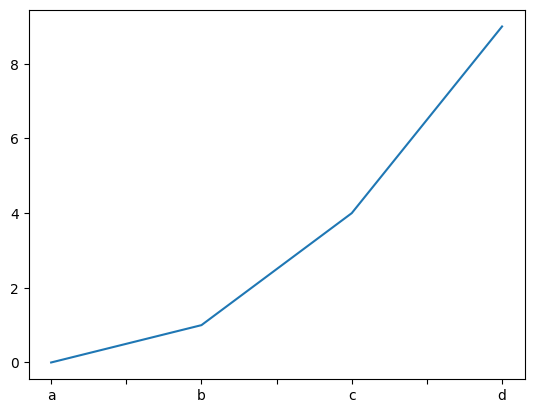

In [7]:
serie9.plot() #grafica la serie frente al índice

**IMPRESIONANTE**, ¿no?

**Pandas integra a Matplotlib en su programación** y permite generar gráficas de una forma tremendamente simple y potente.

La función a partir de la cual se generan la mayor parte de las gráficas es *df.plot*.

y muchos parámetros más que es posible que le suenen del bloque de gráficos con Matplotlib.

Los tipos de gráficas que se pueden realizar vienen dados por el parámetro *kind*. De entre los posibles:

| kind | Descripción |
| :--- | :--- |
| 'line' | gráfico de líneas (valor por defecto) |
| 'bar' | gráfico de barras verticales |
| 'barh' | gráfico de barras horizontales| 
| 'hist' |  histograma|
| 'box' | diagrama de caja y bigotes|
| 'kde' | gráfico de estimación de densidad del kernel|
| 'density'|  lo misma que 'kde'|
| 'area'| gráfico de área|
| 'pie' | gráfico de sectores|
| 'scatter' | diagrama de dispersión (sólo para DataFrame)|
| 'hexbin' | gráfica de hezágonos (sólo para DataFrame)|rame only)

In [ ]:
# help(df.plot)

Vamos con algunos ejemplos ilustrativos:

<Axes: >

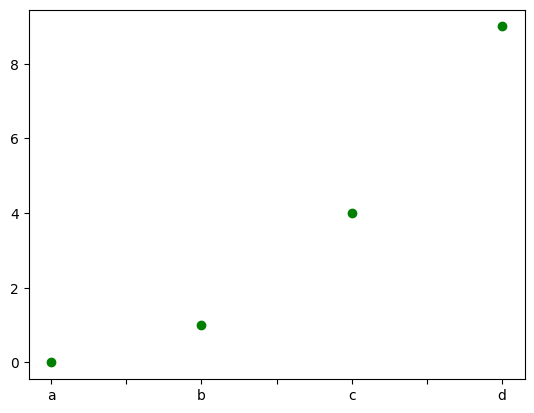

In [8]:
serie9.plot(style='o', color='g')

Acabo de generar una gráfica de dispersión a partir de una Serie.

Y ahora completamos el gráfico anterior.

<Axes: title={'center': 'Diagrama de dispersión'}, xlabel='Eje X', ylabel='Eje Y'>

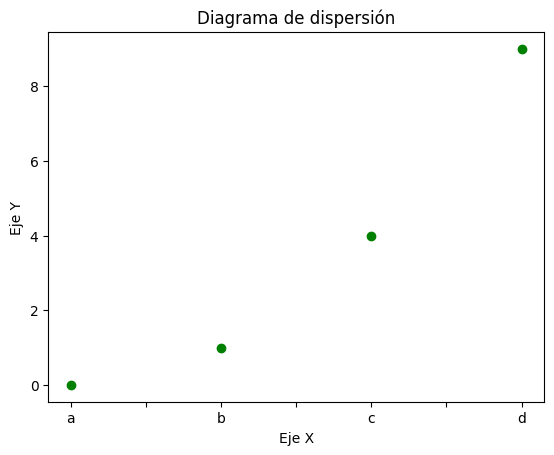

In [9]:
serie9.plot(style='o', color='g', title="Diagrama de dispersión", xlabel="Eje X", ylabel="Eje Y")

**¡Disponemos de toda la potencia de Matplotlib para graficar los datos de una Serie!**